#**Question1**
1. You need to download ‘Stroke Prediction Dataset’ data using the library Scikit learn; ref is given
below.
2. Divide the data randomly in training and testing with a 7:3 ratio 100 times, perform the following
tasks with training data and test the performance on testing data. Testing data should remain
unseen for all steps.

  a. Apply one of the best-known imputation methods to handle the missing/infinite values and state the significance of the used method if required.
  
  b. Visualize the data in 3-D scatter plot and write the inferences, How the data look like.
  
  c. Make a boxplot for each feature and highlight the outlier, if any, then remove the outlier,again visualize the data in 3-D scatter plot to show the outlier effect and write the inferences.

  d. Normalized the data if required, and write a note for what, why and how you performed normalization.

  e. Balance the data if required; you may increase the sample using upsampling if needed.

  f. Perform at least three clustering methods with varying cluster sizes. Perform any three best-known methods to find out correct cluster numbers for each method; how you finalized this cluster number.
  
  g. Perform at least three supervised methods for classification, and report at least three performance metrics out of (accuracy, precision, Cohen's kappa, F1-score, MCC,sensitivity and specificity) with proper reason.


#**Dataset**: 
https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

# **Github link:** https://github.com/sabyasachidatta/Stroke-Prediction-Dataset

#**Imports**

In [150]:
# getting started with the model 
# importing required libraries/packages 
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

#**Load the dataset to Pandas DataFrame**

In [16]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [17]:
# take a look at the data
df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


#**Descriptive Statistics**

In [18]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [19]:
df.describe(include=object)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [20]:
df.shape

(5110, 12)

As shown above, the number of rows (samples) is 5110 and number of columns (variables) is 12. There are some missing values (indicated by NaN). Now, we want to check how many missing values exist in each variable.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Number of Numerical Variables in dataset**

In [22]:
numerical_variables = [feature for feature in df.columns if df[feature].dtypes != 'O']
len(numerical_variables)

7

In [23]:
numerical_variables

['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke']

#**Checking for N/A values in dataset**

In [24]:
# missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [25]:
missing_value = df.isnull().sum()/len(df)*100
print(missing_value)
print("# Missing values in variable bmi\t\t: {:.2f}%".format(missing_value['bmi']))
print("Data shape: {}".format(df.shape))

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64
# Missing values in variable bmi		: 3.93%
Data shape: (5110, 12)


There are ne variables that contain missing values.  'bmi' that accounts for 3.93% of overal samples. To handle these missing values in 'bmi' variable, we will replace them with the average of 'bmi' values.

# **a. Apply one of the best-known imputation methods to handle the missing/infinite values and state the significance of the used method if required.**

# **Handling Missing Values**

In [51]:
# replace missing values in variable 'bmi' with its mean
df['bmi']=df['bmi'].fillna(df['bmi'].median())

# drop variable 'id'
#df.drop(columns='id',axis=1,inplace=True)

# validate there's no more missing values
missing_value = df.isnull().sum()/len(df)*100

print(missing_value)
print("# Missing values in variable 'bmi'\t\t: {}".format(missing_value['bmi']))
print("Shape of data without missing values: {}".format(df.shape))

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64
# Missing values in variable 'bmi'		: 0.0
Shape of data without missing values: (5110, 12)


**Number of discrete variables in dataset**

In [52]:
discrete_variables=[feature for feature in numerical_variables if len(df[feature].unique())<25]
len(discrete_variables)

3

In [53]:
discrete_variables

['hypertension', 'heart_disease', 'stroke']

**Number of Continuous Variables in dataset**

In [54]:
continuous_variables=[feature for feature in numerical_variables if feature not in discrete_variables]
len(continuous_variables)

4

In [55]:
continuous_variables

['id', 'age', 'avg_glucose_level', 'bmi']

# **Scatter Plot**

# **b. Visualize the data in 3-D scatter plot and write the inferences, How the data look like.**

**Age vs BMI vs Avg Glucose for different Gender**

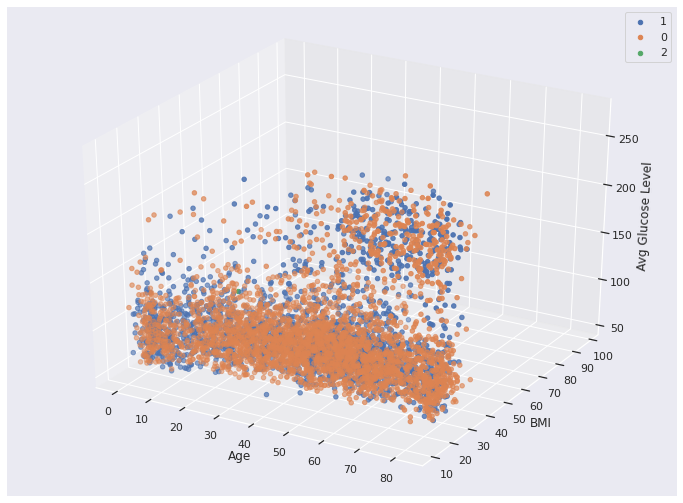

In [56]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection = '3d')

x = df['age']
y = df['bmi']
z = df['avg_glucose_level']

ax.set_xlabel("Age")
ax.set_ylabel("BMI")
ax.set_zlabel("Avg Glucose Level")

for s in df.gender.unique():
  ax.scatter(x[df.gender==s],y[df.gender==s],z[df.gender==s],label=s)

#ax.scatter(x, y, z)
ax.legend()
plt.xticks(np.arange(0, 100, 10))
plt.yticks(np.arange(0, 200, 10))
plt.show()

**Inference:**
From the above scatter plot it is quite visible that as the age increase it leads to increase in BMI & Glucose Level. It is more seen in women compare to men

**Age vs BMI vs Avg Glucose for stroke**





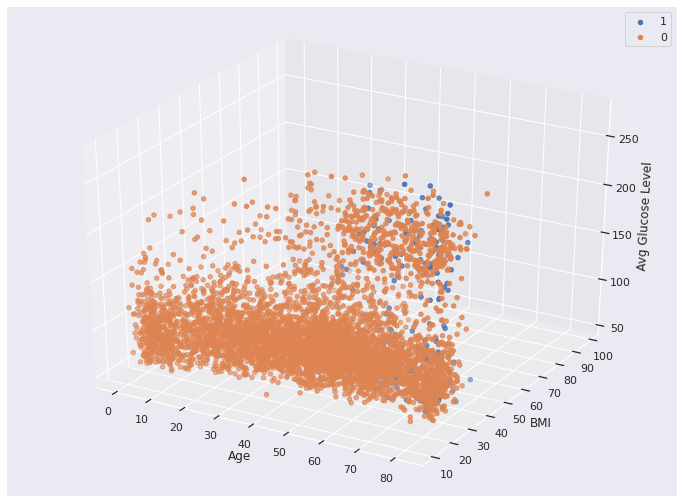

In [57]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection = '3d')

x = df['age']
y = df['bmi']
z = df['avg_glucose_level']

ax.set_xlabel("Age")
ax.set_ylabel("BMI")
ax.set_zlabel("Avg Glucose Level")

for s in df.stroke.unique():
  ax.scatter(x[df.stroke==s],y[df.stroke==s],z[df.stroke==s],label=s)

#ax.scatter(x, y, z)
ax.legend()
plt.xticks(np.arange(0, 100, 10))
plt.yticks(np.arange(0, 200, 10))
plt.show()

**Inference:**
From the above scatter plot it is quite visible that as the BMI increase it leads to increase in Glucose Level and stroke is happening to those groups

**c. Make a boxplot for each feature and highlight the outlier, if any, then remove the outlier, again visualize the data in 3-D scatter plot to show the outlier effect and write the inferences.**

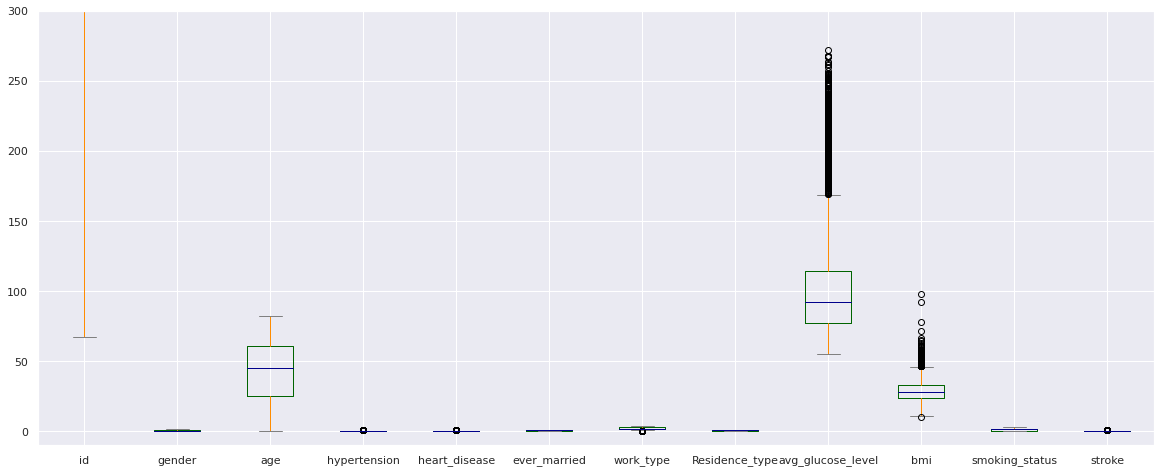

In [58]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
df.plot(kind='box',figsize=(20,8),color=color,ylim=[-10,300])

**Inference :**

There are outliers present in age, bmi and avg_glucose_level (outliers are represented by dot)

#**Changing Category to Numerical Values**

**Since some variables are categorical, we have to convert them into numerical variables.**

In [59]:
print("Unique 'gender': {}".format(df['gender'].unique()))
print("Unique 'ever_married': {}".format(df['ever_married'].unique()))
print("Unique 'work_type': {}".format(df['work_type'].unique()))
print("Unique 'Residence_type': {}".format(df['Residence_type'].unique()))
print("Unique 'smoking_status': {}".format(df['smoking_status'].unique()))

Unique 'gender': [1 0 2]
Unique 'ever_married': [1 0]
Unique 'work_type': [2 3 0 4 1]
Unique 'Residence_type': [1 0]
Unique 'smoking_status': [1 2 3 0]


In [60]:
# create encoder for each categorical variable
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_gender = LabelEncoder()
label_married = LabelEncoder()
label_work = LabelEncoder()
label_residence = LabelEncoder()
label_smoking = LabelEncoder()

In [61]:
df['gender'] = label_gender.fit_transform(df['gender'])
df['ever_married'] = label_married.fit_transform(df['ever_married'])
df['work_type']= label_work.fit_transform(df['work_type'])
df['Residence_type']= label_residence.fit_transform(df['Residence_type'])
df['smoking_status']= label_smoking.fit_transform(df['smoking_status'])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


**After changing Categorical Data to numerical data, lets find how many outliers were found**

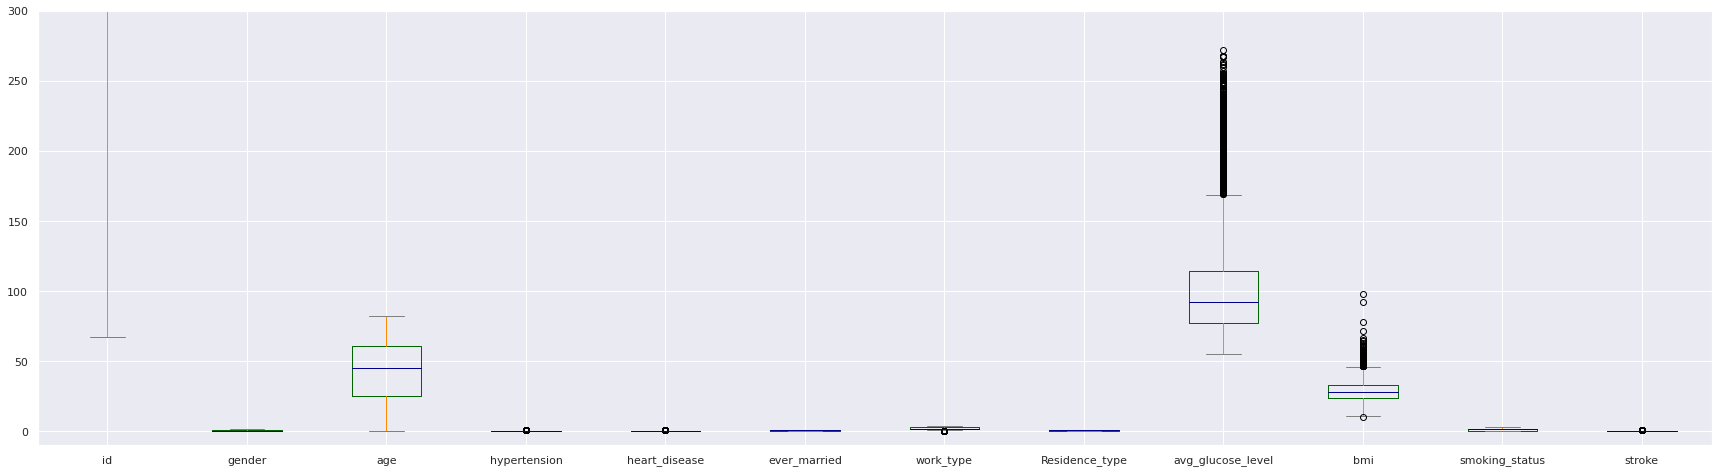

In [62]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
df.plot(kind='box',figsize=(30,8),color=color,ylim=[-10,300])

**Inference:**

Since we found that from above data that outliers is only present only in avg_glucose & BMI only. We will remove those outlier via **IQR** method

# **Treating Outliers with IQR method:**

In [63]:
def remove_outlier(df, col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)

  iqr = q3 - q1
  lower_bound  = q1 - (1.5  * iqr)
  upper_bound = q3 + (1.5 * iqr)

  out_df = df.loc[(df[col] > lower_bound) & (df[col] < upper_bound)]
  return out_df

In [64]:
df_or = remove_outlier(df, "bmi") #df_or means outlier removed from the dataframe
df_or.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4984 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4984 non-null   int64  
 1   gender             4984 non-null   int64  
 2   age                4984 non-null   float64
 3   hypertension       4984 non-null   int64  
 4   heart_disease      4984 non-null   int64  
 5   ever_married       4984 non-null   int64  
 6   work_type          4984 non-null   int64  
 7   Residence_type     4984 non-null   int64  
 8   avg_glucose_level  4984 non-null   float64
 9   bmi                4984 non-null   float64
 10  smoking_status     4984 non-null   int64  
 11  stroke             4984 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 506.2 KB


In [65]:
df_or = remove_outlier(df, "avg_glucose_level") #df_or means outlier removed from the dataframe
df_or.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4483 entries, 2 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4483 non-null   int64  
 1   gender             4483 non-null   int64  
 2   age                4483 non-null   float64
 3   hypertension       4483 non-null   int64  
 4   heart_disease      4483 non-null   int64  
 5   ever_married       4483 non-null   int64  
 6   work_type          4483 non-null   int64  
 7   Residence_type     4483 non-null   int64  
 8   avg_glucose_level  4483 non-null   float64
 9   bmi                4483 non-null   float64
 10  smoking_status     4483 non-null   int64  
 11  stroke             4483 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 455.3 KB


In [66]:
df_or["bmi"].value_counts().sort_index(ascending=False)

97.6    1
92.0    1
78.0    1
66.8    1
64.8    1
       ..
12.3    1
12.0    1
11.5    1
11.3    1
10.3    1
Name: bmi, Length: 400, dtype: int64

**Inference:**
now it ranges within 10.3 & 97.6 unlike previously between 11 & 97.

In [69]:
df_new = df_or.copy()

**Boxplot after removing outlier**

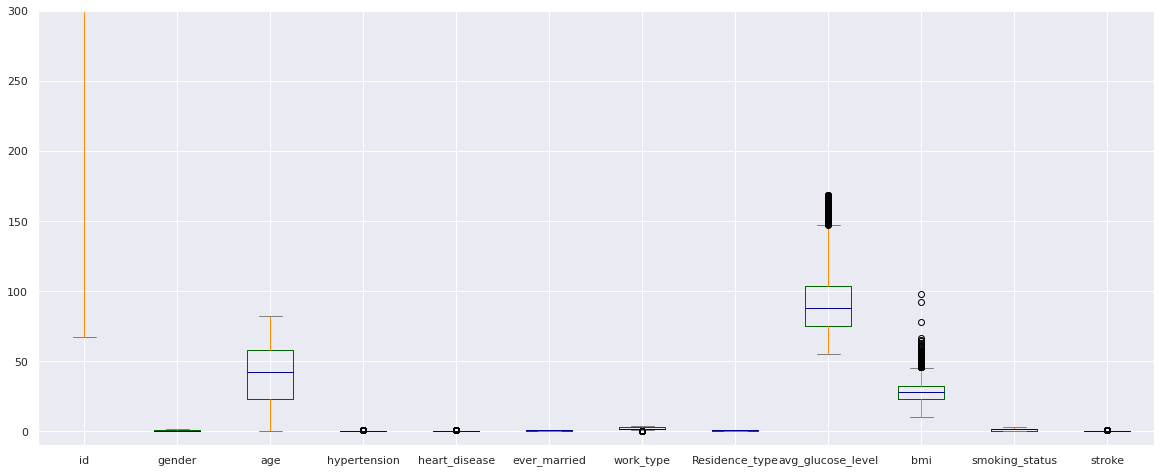

In [70]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
df_new.plot(kind='box',figsize=(20,8),color=color,ylim=[-10,300])

# **Scatter Plot after removing outlier**

**Age vs BMI vs Avg Glucose for stroke**

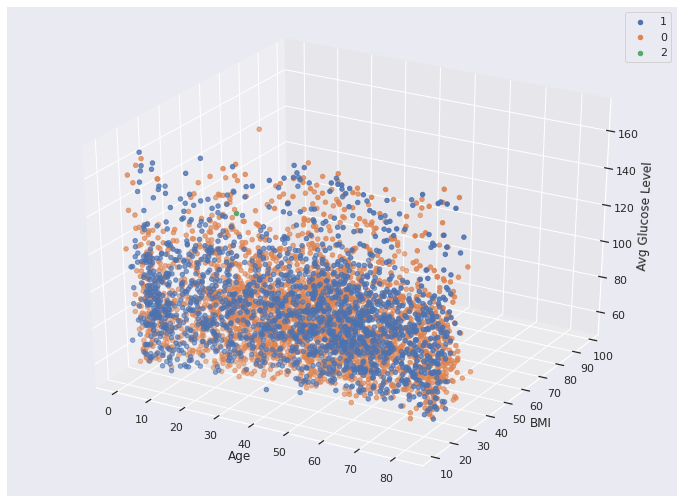

In [72]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection = '3d')

x = df_new['age']
y = df_new['bmi']
z = df_new['avg_glucose_level']

ax.set_xlabel("Age")
ax.set_ylabel("BMI")
ax.set_zlabel("Avg Glucose Level")

for s in df_new.gender.unique():
  ax.scatter(x[df_new.gender==s],y[df_new.gender==s],z[df_new.gender==s],label=s)

#ax.scatter(x, y, z)
ax.legend()
plt.xticks(np.arange(0, 100, 10))
plt.yticks(np.arange(0, 200, 10))
plt.show()

**Inference:** 

After removing outlier we can see from the above scatter plot it is quite visible that as the age increase it leads to increase in BMI & Glucose Level. It visualise even distribution among all the genders

**Age vs BMI vs Avg Glucose for stroke**

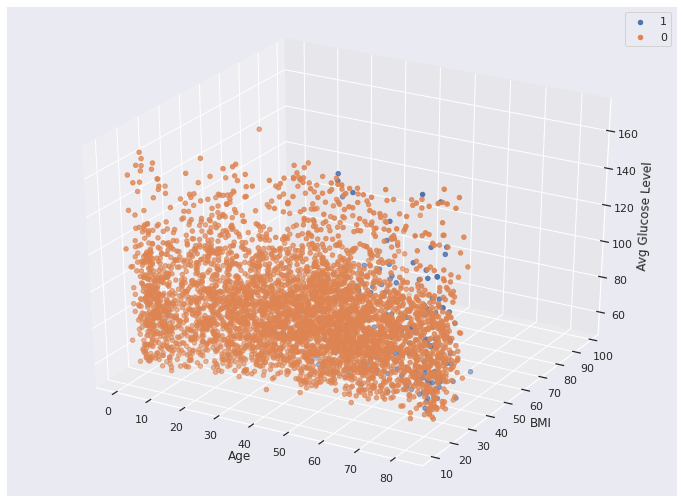

In [71]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection = '3d')

x = df_new['age']
y = df_new['bmi']
z = df_new['avg_glucose_level']

ax.set_xlabel("Age")
ax.set_ylabel("BMI")
ax.set_zlabel("Avg Glucose Level")

for s in df_new.stroke.unique():
  ax.scatter(x[df_new.stroke==s],y[df_new.stroke==s],z[df_new.stroke==s],label=s)

#ax.scatter(x, y, z)
ax.legend()
plt.xticks(np.arange(0, 100, 10))
plt.yticks(np.arange(0, 200, 10))
plt.show()

**Inference:** 

From the above scatter plot it is quite visible that as the BMI increase it leads to increase in Glucose Level and stroke is happening to those groups

# **d. Normalized the data if required, and write a note for what, why and how you performed normalization.**

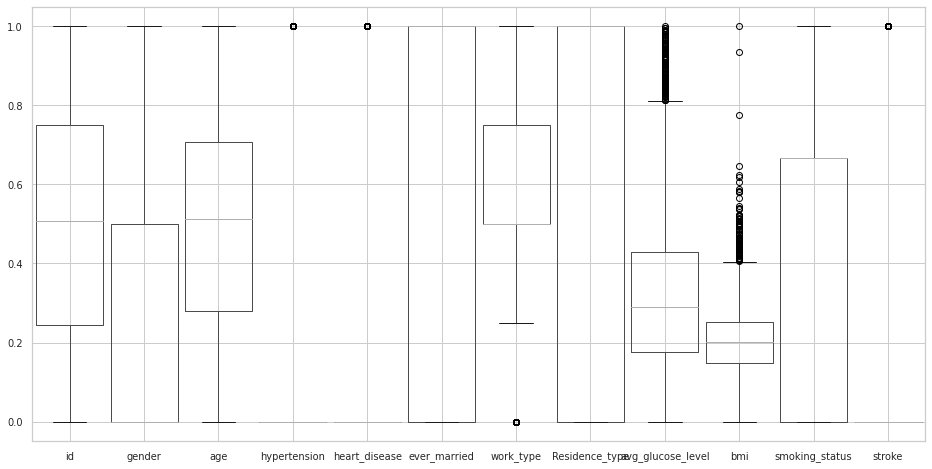

In [97]:
# Using MinMaxScaler to perform normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df_new) 
df_new.loc[:,:] = scaled_values

sns.set(rc={'figure.figsize':(16,8)}, font_scale=0.9, style='whitegrid')
df_new.boxplot(widths = 0.9)

# **e. Balance the data if required; you may increase the sample using upsampling if needed.**

# **Class (Target) Distribution**

**Now, If the class is highly imbalanced, we have to solve this issue so that our model will not be biased towards the majority class.**

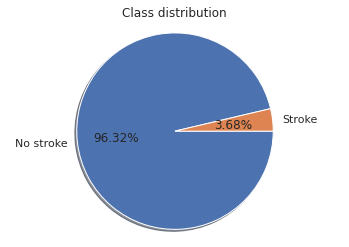

# samples associated with no stroke: 4318
# samples associated with stroke: 165


In [92]:
stroke_occur = df_new['stroke'].value_counts()
stroke_names = ['No Stroke','Stroke']
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with no stroke: {}".format(stroke_occur[0]))
print("# samples associated with stroke: {}".format(stroke_occur[1]))

# **Handle Imbalanced Class**

We are going to use one of oversampling technique called resample from sklearn, by synthesising new samples from the minority class to have the same number of samples as the majority class. Resampling technique is chosen because we do not want to loose significant amount of information (97.88%) as if we use undersampling technique.

In [91]:
from sklearn.utils import resample

df_minority = df_new[df_new['stroke']==1]
df_majority = df_new[df_new['stroke']==0]

min_class = resample(df_minority, replace=True,n_samples=4225,random_state=10) 
df_sample = pd.concat([min_class,df_majority])
df_sample["stroke"].value_counts()

0    4318
1    4225
Name: stroke, dtype: int64

In [93]:
df_sample.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
18,27458,0,60.0,0,0,0,2,1,89.22,37.8,2,1
188,30184,1,82.0,0,0,1,2,0,86.62,29.5,1,1
35,712,0,82.0,1,1,0,2,0,84.03,26.5,1,1
100,12363,1,64.0,0,1,1,0,1,74.10,28.8,0,1
173,2182,0,80.0,1,0,1,3,0,91.02,32.9,1,1


#**Data Splitting**

In [128]:
from sklearn.model_selection import train_test_split
def split_train_valid_test(X,y,test_size=0.1,random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=random_state, stratify=y)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=test_size/(1-test_size), random_state=random_state, stratify=y_train)
    return X_train, X_valid, X_test, y_train, y_valid, y_test

X_train, X_valid, X_test, y_train, y_valid, y_test = split_train_valid_test(X,y,test_size=0.3,random_state=42)
_, train_counts = np.unique(y_train, return_counts=True)
_, valid_counts = np.unique(y_valid, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)
print("[train] # class 0: {} | # class 1: {}".format(train_counts[0],train_counts[1]))
print("[valid] # class 0: {} | # class 1: {}".format(valid_counts[0],valid_counts[1]))
print("[test]  # class 0: {} | # class 1: {}".format(test_counts[0],test_counts[1]))

[train] # class 0: 1727 | # class 1: 1727
[valid] # class 0: 1295 | # class 1: 1296
[test]  # class 0: 1296 | # class 1: 1295


# **f. Perform at least three clustering methods with varying cluster sizes. Perform any three best-known methods to find out correct cluster numbers for each method; how you finalized this cluster number.**

# **Clustering Methods 1: K Means Clustering**

**Why Kmeans using**

1. If variables are huge, then K-Means most of the times computationally faster, if we keep k smalls. 
2.  K-Means produce tighter clusters especially if the clusters are globular.

In [129]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
  KM_est = KMeans(n_clusters=n, init='k-means++').fit(X_train)
  clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
  silhouette_avg = silhouette_score(X_train, KM_est.labels_)
  s_scores.append(silhouette_avg) # data for the silhouette score method

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


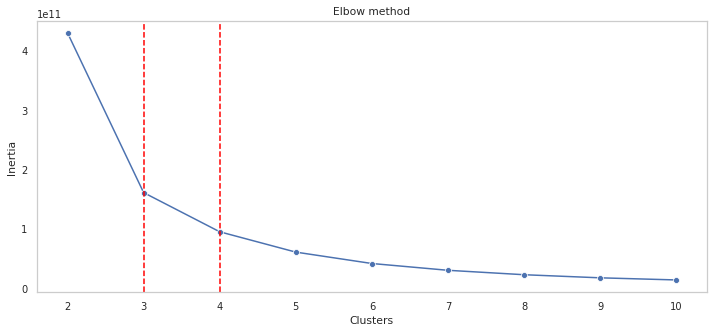

In [130]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("Clusters")
ax.set_ylabel("Inertia")
ax.axvline(3, ls="--", c="red")
ax.axvline(4, ls="--", c="red")
plt.grid()
plt.show()

**Inference:**

From the above plot we get that "elbow" need to be 3. So our choice of 3 or 4 clusters seems to be fair. Let's see the silhouette score to get the exact elbow point.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


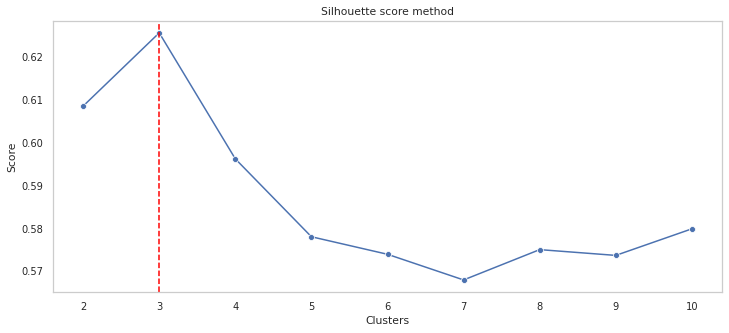

In [131]:
# Plot for Silhouette score to find the optimum K

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("Clusters")
ax.set_ylabel("Score")
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

**Inference:**

Now we can say that the best option would be 3. So we will implement K=3

In [132]:
# To initialize and fit K-Means model
KM_clusters = KMeans(n_clusters=3 , init='k-means++').fit(X_train)
KM_clusters.labels_

array([2, 0, 1, ..., 0, 0, 0], dtype=int32)

In [133]:
KM_clusters.cluster_centers_

array([[1.01507092e+04, 4.41812722e-01, 5.41681651e+01, 1.71178396e-01,
        9.86505183e-02, 7.24271439e-01, 2.13287578e+00, 5.93149986e-01,
        9.08873111e+01, 2.81644842e+01, 1.49219366e+00],
       [6.12939970e+04, 3.84866565e-01, 5.29617531e+01, 1.49791290e-01,
        8.09724500e-02, 7.25450161e-01, 2.01602664e+00, 5.63847235e-01,
        9.02484398e+01, 2.91443843e+01, 1.39388846e+00],
       [3.58207182e+04, 3.96846514e-01, 5.24381197e+01, 1.45967601e-01,
        6.28156561e-02, 7.41634228e-01, 2.24022698e+00, 4.45583757e-01,
        9.39419321e+01, 2.85753761e+01, 1.35314458e+00]])

In [134]:
KM_clusters.predict(X_test)

array([0, 1, 2, ..., 2, 1, 0], dtype=int32)

# **Clustering Methods 2: Agglomerative Clustering**

**Why Agglomerative using**

1. It can produce an ordering of objects, which may be informative for the display
2. There is no need to pre-specify the number of clusters

In [135]:
# Importing AgglomerativeClustering from Sklearn
from sklearn.cluster import AgglomerativeClustering

# Running Agglomerative Clustering
no_of_clusters = []
n_clusters = range(2, 10) # Range is arbitrarily chosen
ag_sil_score = [] # silouette scores

for p in n_clusters:
    AG = AgglomerativeClustering(n_clusters=p).fit(X_train)
    no_of_clusters.append((len(np.unique(AG.labels_))))
    ag_sil_score.append(silhouette_score(X_train, AG.labels_))
    
results = pd.DataFrame([n_clusters, ag_sil_score], index=['Number of clusters','Silhouette Score']).T
results.sort_values(by='Silhouette Score', ascending=False).head() # display only 5 best scores

,Number of clusters,Silhouette Score
2,4.0,0.586659
0,2.0,0.583382
1,3.0,0.567730
3,5.0,0.558771
7,9.0,0.545922


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


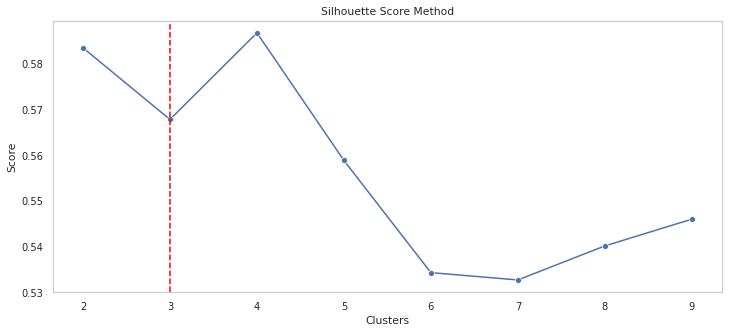

In [136]:
# For plotting silhoette score

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, ag_sil_score, marker='o', ax=ax)
ax.set_title("Silhouette Score Method")
ax.set_xlabel("Clusters")
ax.set_ylabel("Score")
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

**Inference**

From the above silhouette score model we observe that 3 is optimum cluster number.So we implement **Agglomerative Clustering with Cluster size = 3**

In [137]:
# To initialize and fit agglomerative model
AG = AgglomerativeClustering(n_clusters=3).fit(X_train)
AG.labels_

array([0, 1, 0, ..., 1, 1, 1])

In [138]:
AG.n_leaves_

3454

# **Clustering Methods 3: MiniBatch KMeans Clustering**

**Why MiniBatchKMeans using**

1. It reduce the computational cost by not using all the dataset each iteration but a subsample of a fixed size.
2. Mini-batches are subsets of the input data which is given, randomly sampled in each training iteration

In [139]:
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores


from sklearn.cluster import MiniBatchKMeans
for n in n_clusters:
    KM_est = MiniBatchKMeans(n_clusters=n, init='k-means++').fit(X_train)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(X_train, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


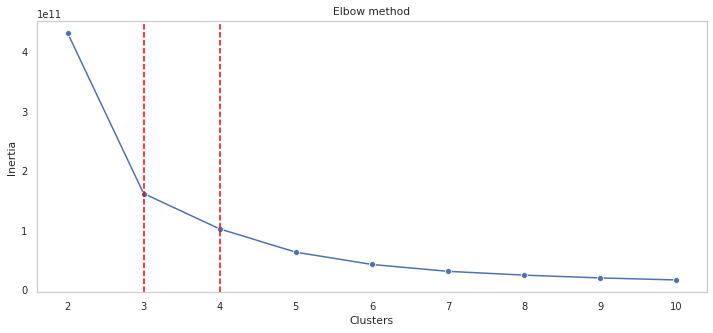

In [140]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("Clusters")
ax.set_ylabel("Inertia")
ax.axvline(3, ls="--", c="red")
ax.axvline(4, ls="--", c="red")
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


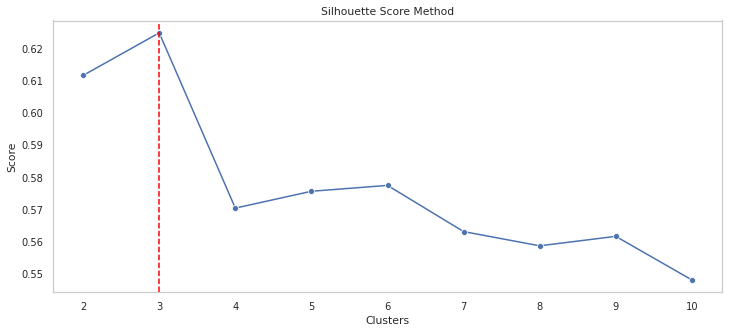

In [141]:
# Plot for Silhouette score to find the optimum K

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette Score Method")
ax.set_xlabel("Clusters")
ax.set_ylabel("Score")
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

In [142]:
# To initialize and fit Mini batch K-Means model
MBKM_clusters = MiniBatchKMeans(n_clusters=3 , init='k-means++').fit(X_train)

MBKM_clusters.labels_

array([1, 2, 0, ..., 2, 2, 2], dtype=int32)

In [143]:
MBKM_clusters.cluster_centers_

array([[6.09693279e+04, 3.79454582e-01, 5.31884394e+01, 1.54331619e-01,
        7.98803768e-02, 7.25204711e-01, 2.02851961e+00, 5.56327956e-01,
        9.18193723e+01, 2.93450984e+01, 1.42240181e+00],
       [3.51518662e+04, 3.79145037e-01, 5.21438247e+01, 1.31827366e-01,
        6.85472898e-02, 7.24892072e-01, 2.22228767e+00, 4.45322484e-01,
        9.47343733e+01, 2.86808353e+01, 1.36170017e+00],
       [9.71180001e+03, 4.27160341e-01, 5.44614229e+01, 1.59322146e-01,
        1.02206523e-01, 7.33321753e-01, 2.08850964e+00, 5.73503738e-01,
        9.08523896e+01, 2.84574095e+01, 1.58988730e+00]])

In [144]:
MBKM_clusters.predict(X_test)

array([2, 0, 1, ..., 1, 0, 2], dtype=int32)

# **G. Perform at least three supervised methods for classification, and report at least three performance metrics out of (accuracy, precision, Cohen's kappa, F1-score, MCC, sensitivity and specificity) with proper reason.**

# **Classification Method**
We will implement and benchmark the performance of the following 3 ML algorithms:

1. Gaussian Naive Bayes (GNB)
2. Logistic Regression (LR)
3. Decision Tree (DT)

# **Performance Metrics**
The peformance will be evaluated based on two different groups of metrics:

Sensitivity, specificity, and area under the curve (AUC)
Precision, accuracy, and F1 score

# **Classification method 1: Gaussian Naive Bayes (GNB)**

In [148]:
import time as timer
start = timer.time()
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_gnb = gnb_model.predict(X_test)
y_gnb_prob = gnb_model.predict_proba(X_test)

Finished training within 0.00 seconds


In [168]:
# calculate Accuracy, precision,and f1 scores
acc_gnb = accuracy_score(y_test,y_gnb)
prec_gnb = precision_score(y_test,y_gnb)
f1_gnb = f1_score(y_test,y_gnb)
print("Accuracy score for GNB: {:.2f}".format(acc_gnb))
print("Precision score for GNB: {:.2f}".format(prec_gnb))
print("F1 score for GNB: {:.2f}".format(f1_gnb))

# calculate sensitivity, specificity, and auc
fpr, tpr, _ = roc_curve(y_test,  y_gnb_prob[:,1])
auc_gnb = roc_auc_score(y_test, y_gnb_prob[:,1])

print("AUC score for GNB: {:.2f}".format(auc_gnb))

Accuracy score for GNB: 0.80
Precision score for GNB: 0.73
F1 score for GNB: 0.82
AUC score for GNB: 0.87


**Inference:**

Accuracy score is 80% and AUC score has increased to 87% so it good

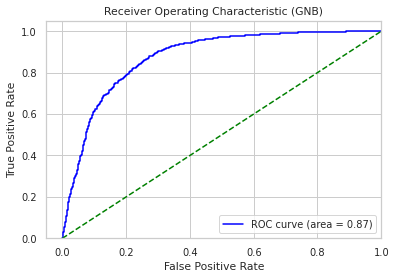

In [153]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_gnb)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (GNB)')
ax.legend(loc="lower right")
plt.show()

# **Classification method 2: Logistic Regression (LR)**

In [156]:
start = timer.time()
logit_model = LogisticRegression(solver='lbfgs', random_state=42)
logit_model.fit(X_train, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_logit = logit_model.predict(X_test)
y_logit_prob = logit_model.predict_proba(X_test)

Finished training within 0.08 seconds


In [165]:
# calculate accuracy, precision,and f1 scores
acc_logit = accuracy_score(y_test,y_logit)
prec_logit = precision_score(y_test,y_logit)
f1_logit = f1_score(y_test,y_logit)
print("Accuracy score for LR: {:.2f}".format(acc_logit))
print("Precision score for LR: {:.2f}".format(prec_logit))
print("F1 score for LR: {:.2f}".format(f1_logit))

# calculate sensitivity, specificity, and auc
fpr, tpr, _ = roc_curve(y_test,  y_logit_prob[:,1])
auc_logit = roc_auc_score(y_test, y_logit_prob[:,1])

print("AUC score for LR: {:.2f}".format(auc_logit))

Accuracy score for LR: 0.77
Precision score for LR: 0.75
F1 score for LR: 0.77
AUC score for LR: 0.83


**Inference**

Accuracy score is reduce to 77% and AUC score has decreased to 83%. lets try another model

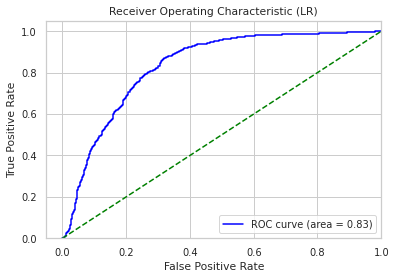

In [158]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_logit)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (LR)')
ax.legend(loc="lower right")
plt.show()

**Inference:**

Logistic regression is performing well, but can we improve performance using another model

# **Classification method 3: Decision Tree (DT)**

In [159]:
start = timer.time()
dtree_model = DecisionTreeClassifier(random_state=42)
dtree_model.fit(X_train, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_dtree = dtree_model.predict(X_test)
y_dtree_prob = dtree_model.predict_proba(X_test)

Finished training within 0.02 seconds


In [162]:
# calculate accuracy, precision,and f1 scores
acc_dtree = accuracy_score(y_test,y_dtree)
prec_dtree = precision_score(y_test,y_dtree)
f1_dtree = f1_score(y_test,y_dtree)
print("Accuracy score for DT: {:.2f}".format(acc_dtree))
print("Precision score for DT: {:.2f}".format(prec_dtree))
print("F1 score for DT: {:.2f}".format(f1_dtree))

# calculate sensitivity, specificity, and auc
fpr, tpr, _ = roc_curve(y_test,  y_dtree_prob[:,1])
auc_dtree = roc_auc_score(y_test, y_dtree_prob[:,1])

print("AUC score for DT: {:.2f}".format(auc_dtree))

Accuracy score for DT: 0.94
Precision score for DT: 0.94
F1 score for DT: 0.94
AUC score for DT: 0.94


**Inference**

Accuracy score has increased to 94% and AUC score has increased to 94%. So it the best model

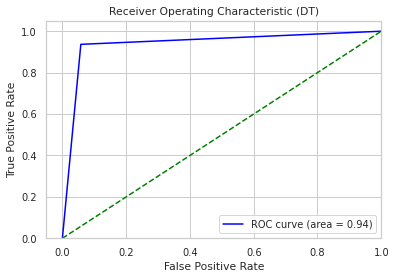

In [161]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_dtree)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (DT)')
ax.legend(loc="lower right")
plt.show()

# **Performance Benchmark Across Models**

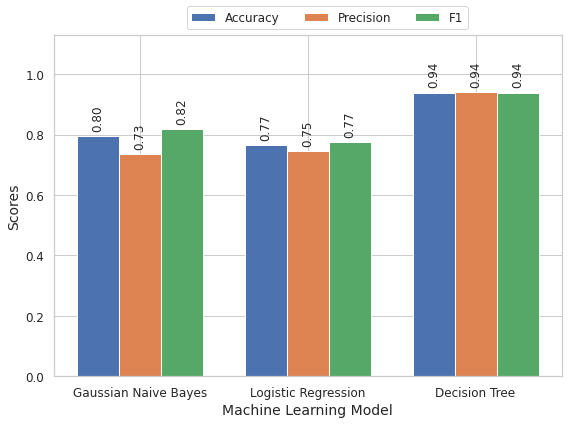

In [181]:
ml_names = ['Gaussian Naive Bayes', 'Logistic Regression', 'Decision Tree']

acc_all = [acc_gnb, acc_logit, acc_dtree]
prec_all = [prec_gnb, prec_logit, prec_dtree]
f1_all = [f1_gnb, f1_logit, f1_dtree]

def autolabel(bars):
    """Attach a text label above each bar in displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=12,
                    rotation=90,
                    ha='center', va='bottom')

width = 0.25  # the width of the bars
r1 = np.arange(len(ml_names))  # the label locations
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

# plot sensitivity, specificity, and auc
fig, ax = plt.subplots(figsize=(8,6))
bar1 = ax.bar(r1, acc_all, width, label='Accuracy')
bar2 = ax.bar(r2, prec_all, width, label='Precision')
bar3 = ax.bar(r3, f1_all, width, label='F1')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim([0,1.13])
ax.set_ylabel('Scores',fontsize=14)

#ax.set_title('Performance benchmark across ML models')
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model",fontsize=14)
ax.legend(loc='lower left',ncol=3,bbox_to_anchor=(0.25,1),fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
fig.savefig("ml_benchmark_f1.pdf", bbox_inches='tight')
plt.show()    

# **Conclusions**

In the given dataset we first applied general preprocessing to remove/impute missing values. Standardization was important as independent features were in different scales. We must make sure that target class is not imbalanced and if it is so then we must handle it using appropriate technique. Among three models applied, **Decision Tree** was found to be the most successful with **f1 score of around 94%.**